In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from IPython.core.display import HTML

In [2]:
#get "mixed types" error with imports. should make sure its importing correctly
charges = pd.read_csv('data/2017/extract_public_2015_20170829132341_charges_20170101-20170829_TRAVIS.csv')
crash = pd.read_csv('data/2017/extract_public_2015_20170829132341_crash_20170101-20170829_TRAVIS.csv')
damages = pd.read_csv('data/2017/extract_public_2015_20170829132341_damages_20170101-20170829_TRAVIS.csv')
endorsements = pd.read_csv('data/2017/extract_public_2015_20170829132341_endorsements_20170101-20170829_TRAVIS.csv')
lookup = pd.read_csv('data/2017/extract_public_2015_20170829132341_lookup_20170101-20170829_TRAVIS.csv')
person = pd.read_csv('data/2017/extract_public_2015_20170829132341_person_20170101-20170829_TRAVIS.csv')
primaryperson = pd.read_csv('data/2017/extract_public_2015_20170829132341_primaryperson_20170101-20170829_TRAVIS.csv')
restrictions = pd.read_csv('data/2017/extract_public_2015_20170829132341_restrictions_20170101-20170829_TRAVIS.csv')
unit = pd.read_csv('data/2017/extract_public_2015_20170829132341_unit_20170101-20170829_TRAVIS.csv')

/home/michael/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,20,35,46,154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/michael/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(unit.columns)

81

## Finding duplicate columns across sections of data

In [4]:
#Using for loops since values() method returns a list, dont want list of lists
columns = []
for col in charges.columns.values:
    columns.append(col)
for col in crash.columns.values:
    columns.append(col)
for col in damages.columns.values:
    columns.append(col)
for col in endorsements.columns.values:
    columns.append(col)
# lookup is a data dictionary, not actual data
# for col in lookup.columns.values:
#     columns.append(col)
for col in person.columns.values:
    columns.append(col)
for col in primaryperson.columns.values:
    columns.append(col)
for col in restrictions.columns.values:
    columns.append(col)
for col in unit.columns.values:
    columns.append(col)
    
col_count = Counter(columns)

In [5]:
dup_col = []
for key, value in col_count.iteritems():
    if value > 1:
        dup_col.append(key)
# dup_col

## Joining each section of data

In [6]:
#investigating to make sure outer join works as expected
dup_id = charges[charges.duplicated(subset='Crash_ID', keep=False)]['Crash_ID'].unique()
dup2 = crash[crash.Crash_ID.duplicated()]['Crash_ID'].unique()
dup3 = damages[damages.Crash_ID.duplicated()]['Crash_ID'].unique()

In [7]:
# combining person tables since almost identical, no more duplicate person columns
join = pd.merge(charges, crash, how='outer', on='Crash_ID')
join = pd.merge(join, damages, how='outer', on='Crash_ID')
join = pd.merge(join, endorsements, how='outer', on=['Crash_ID', 'Unit_Nbr'])
join = pd.merge(join, person, how='outer', on=['Crash_ID', 'Prsn_Nbr', 'Unit_Nbr'])
join = pd.merge(join, primaryperson, how='outer', on=['Crash_ID', 'Prsn_Nbr', 'Unit_Nbr'])
join = pd.merge(join, restrictions, how='outer', on=['Crash_ID', 'Unit_Nbr'])
join = pd.merge(join, unit, how='outer', on=['Crash_ID', 'Unit_Nbr'])

In [8]:
170 + 77 + 27 + 6 + 32 + 3 + 3 + 2 - (17) + 3

306

In [9]:
len(join.columns)

311

In [10]:
# HTML(join[join.Crash_ID == dup3[0]].to_html())


In [11]:
mini_2017 = join.sample(n=100)

# HTML(mini_2017.to_html())

## Merging complete, finding patterns in 2017

### Seem interesting:
- Charge
- Crash_Sev_ID
- Investigate_Notify_Time
- Investigate_Notify_Meth
- Investigate_Arrv_Time

In [12]:
for i in crash.columns:
    print i

Crash_ID
Crash_Fatal_Fl
Cmv_Involv_Fl
Schl_Bus_Fl
Rr_Relat_Fl
Medical_Advisory_Fl
Amend_Supp_Fl
Active_School_Zone_Fl
Crash_Date
Crash_Time
Case_ID
Local_Use
Rpt_CRIS_Cnty_ID
Rpt_City_ID
Rpt_Outside_City_Limit_Fl
Thousand_Damage_Fl
Rpt_Latitude
Rpt_Longitude
Rpt_Rdwy_Sys_ID
Rpt_Hwy_Num
Rpt_Hwy_Sfx
Rpt_Road_Part_ID
Rpt_Block_Num
Rpt_Street_Pfx
Rpt_Street_Name
Rpt_Street_Sfx
Private_Dr_Fl
Toll_Road_Fl
Crash_Speed_Limit
Road_Constr_Zone_Fl
Road_Constr_Zone_Wrkr_Fl
Rpt_Street_Desc
At_Intrsct_Fl
Rpt_Sec_Rdwy_Sys_ID
Rpt_Sec_Hwy_Num
Rpt_Sec_Hwy_Sfx
Rpt_Sec_Road_Part_ID
Rpt_Sec_Block_Num
Rpt_Sec_Street_Pfx
Rpt_Sec_Street_Name
Rpt_Sec_Street_Sfx
Rpt_Ref_Mark_Offset_Amt
Rpt_Ref_Mark_Dist_Uom
Rpt_Ref_Mark_Dir
Rpt_Ref_Mark_Nbr
Rpt_Sec_Street_Desc
Rpt_CrossingNumber
Wthr_Cond_ID
Light_Cond_ID
Entr_Road_ID
Road_Type_ID
Road_Algn_ID
Surf_Cond_ID
Traffic_Cntl_ID
Investigat_Notify_Time
Investigat_Notify_Meth
Investigat_Arrv_Time
Report_Date
Investigat_Comp_Fl
ORI_Number
Investigat_Agency_ID
Investigat_

In [13]:
injry_sevr_2017 = crash.groupby('Crash_Sev_ID').agg('count')
injry_sevr_map = {0: 'unknown', 1: 'incapacitating', 2: 'non-incapacitating', 3: 'possible', 4: 'killed', 5: 'none'}

In [14]:
injry_sevr_2017.index = injry_sevr_2017.index.map(lambda x: injry_sevr_map[x])

In [15]:
injry_sevr_2017

,Crash_ID,Crash_Fatal_Fl,Cmv_Involv_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Amend_Supp_Fl,Active_School_Zone_Fl,Crash_Date,Crash_Time,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
Crash_Sev_ID,,,,,,,,,,,,,,,,,,,,,
unknown,449,449,449,449,449,449,449,449,449,449,...,449,449,449,449,449,449,398,440,219,0
incapacitating,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,386,397,228,0
non-incapacitating,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,...,2264,2264,2264,2264,2264,2264,2133,2232,1308,0
possible,2473,2473,2473,2473,2473,2473,2473,2473,2473,2473,...,2473,2473,2473,2473,2473,2473,2334,2439,1373,0
killed,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,56,61,43,0
none,7458,7458,7458,7458,7458,7458,7458,7458,7458,7458,...,7458,7458,7458,7458,7458,7458,6917,7354,3876,0


What were the crashes that hurt/killed people like? What time of day, and where

In [21]:
violent_2017 = join[(join['Crash_Sev_ID'] == 1) | (join['Crash_Sev_ID'] == 4)]
violent_2017 = violent_2017.loc[:, ('Day_of_Week', 'Crash_Date', 'Crash_Time', 'Rpt_Road_Part_ID', 'Rpt_Street_Name')]

In [22]:
violent_2017.head()

,Day_of_Week,Crash_Date,Crash_Time,Rpt_Road_Part_ID,Rpt_Street_Name
219,SUN,01/08/2017,03:22 PM,1.0,AIRPORT
268,TUE,01/10/2017,05:54 AM,1.0,NOT REPORTED
300,TUE,01/10/2017,03:44 PM,1.0,GRACY FARMS LN
305,WED,01/11/2017,06:34 AM,1.0,IH 35
306,WED,01/11/2017,06:34 AM,1.0,IH 35


In [23]:
violent_2017.groupby('Day_of_Week').agg('count')

,Crash_Date,Crash_Time,Rpt_Road_Part_ID,Rpt_Street_Name
Day_of_Week,,,,
FRI,80,80,80,80
MON,60,60,60,60
SAT,100,100,100,100
SUN,81,81,81,81
THU,67,67,67,67
TUE,68,68,68,68
WED,93,93,93,93


In [24]:
violent_date_agg_2017 = violent_2017.groupby('Crash_Date').agg('count')
pd.to_datetime(violent_date_agg_2017.index)

DatetimeIndex(['2017-01-01', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
               '2017-01-11', '2017-01-13',
               ...
               '2017-08-08', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-19', '2017-08-21'],
              dtype='datetime64[ns]', name=u'Crash_Date', length=205, freq=None)

/home/michael/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  


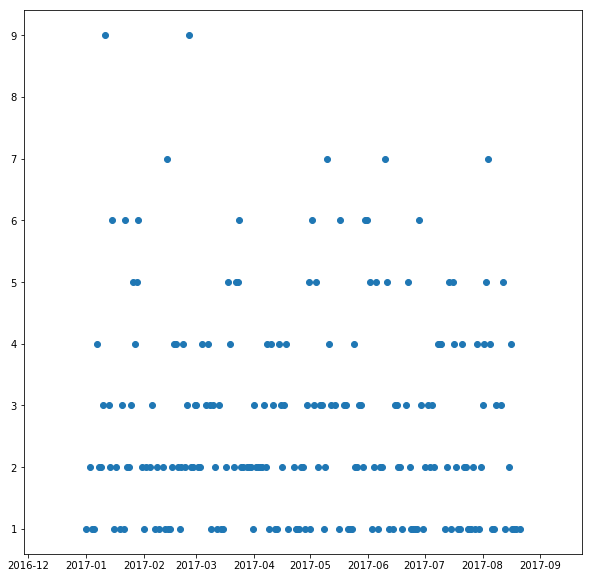

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(violent_date_agg_2017.index.to_datetime().tolist(), violent_date_agg_2017['Day_of_Week'])
plt.show()

In [26]:
violent_weekday_agg_2017 = violent_2017.groupby('Day_of_Week').agg('count')
